# Watershed segmentation of merozoites
This step uses parasite masks in addition to the images. The parasite masks are used to locate the regions to segment, in order to find the merozoites.

In [1]:
# First we do the required imports
import sys
import os
sys.path.append(os.path.sep + os.path.join(*(os.path.abspath('').split(os.path.sep)[:next((i for i in range(len(os.path.abspath('').split(os.path.sep)) -1, -1, -1) if 'LiverStagePipeline' in os.path.abspath('').split(os.path.sep)[i]), None)+1])))

from segmentation.conventional import merozoite_watershed
from utils import cell_viewer

In [2]:
img_folder = '/mnt/DATA1/anton/data/unformatted/high_res_subset_from_Felix/F10_GS-HSP' # folder containing images
parasite_mask_folder = '/mnt/DATA1/anton/data/unformatted/high_res_subset_from_Felix/F10_GS-HSP_watershed_test' # folder containing parasite masks
merozoite_mask_folder = '/mnt/DATA1/anton/data/unformatted/high_res_subset_from_Felix/F10_GS-HSP_watershed_test_merozoites' # folder to store merozoite masks in

Let's inspect the images again to see which channel contain the hepatocytes

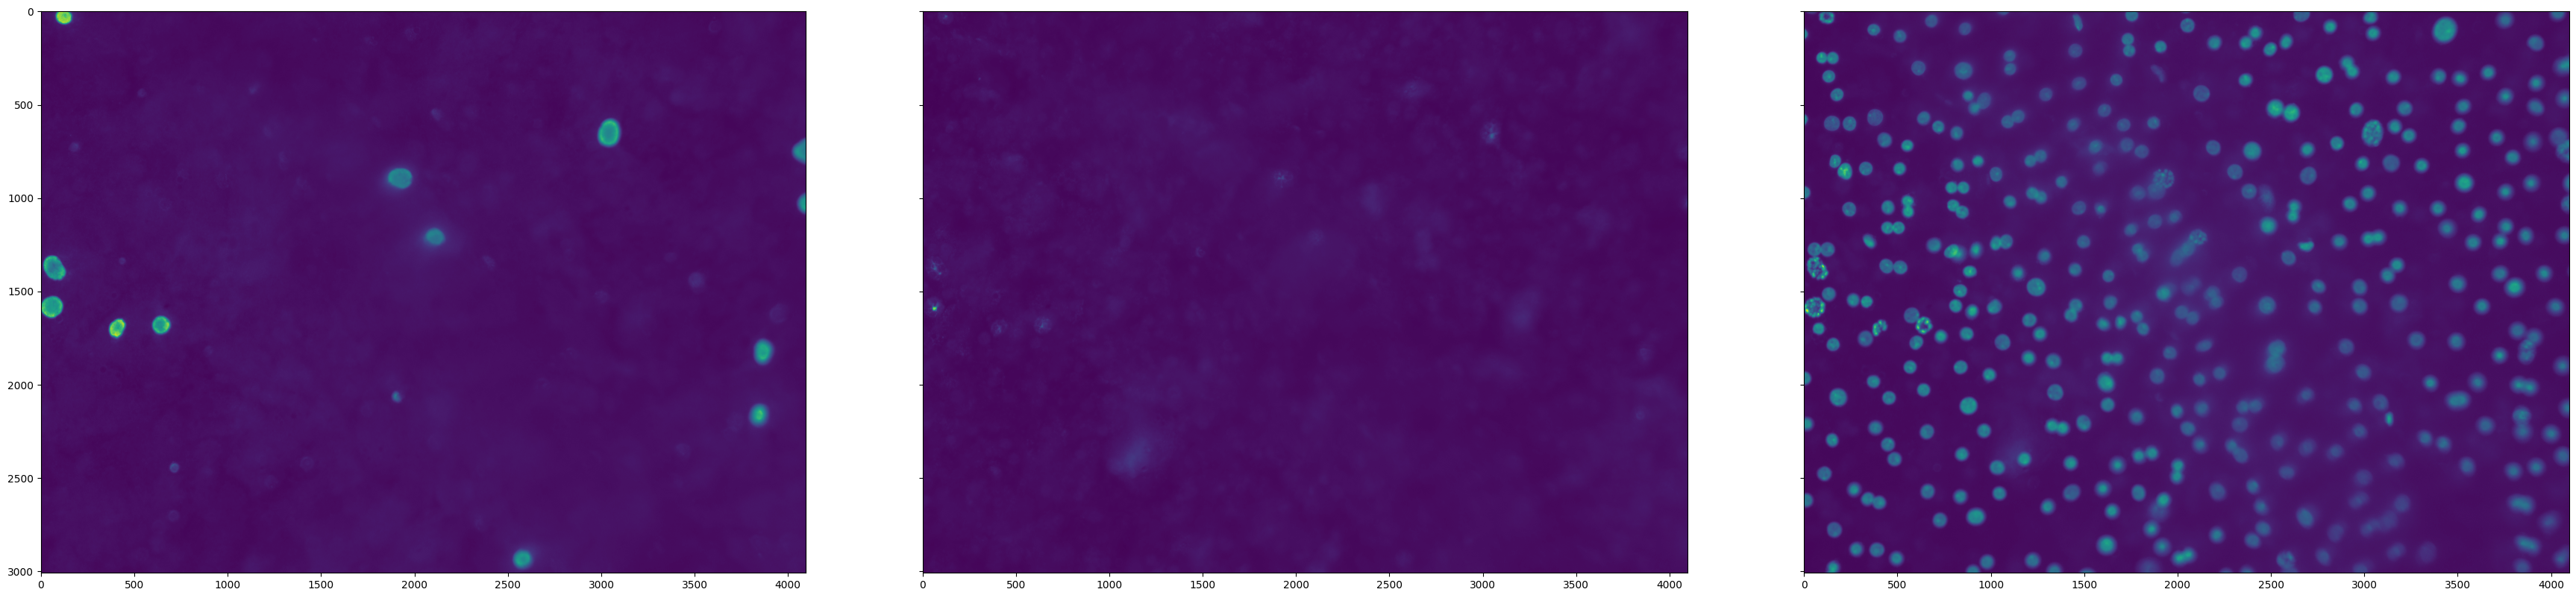

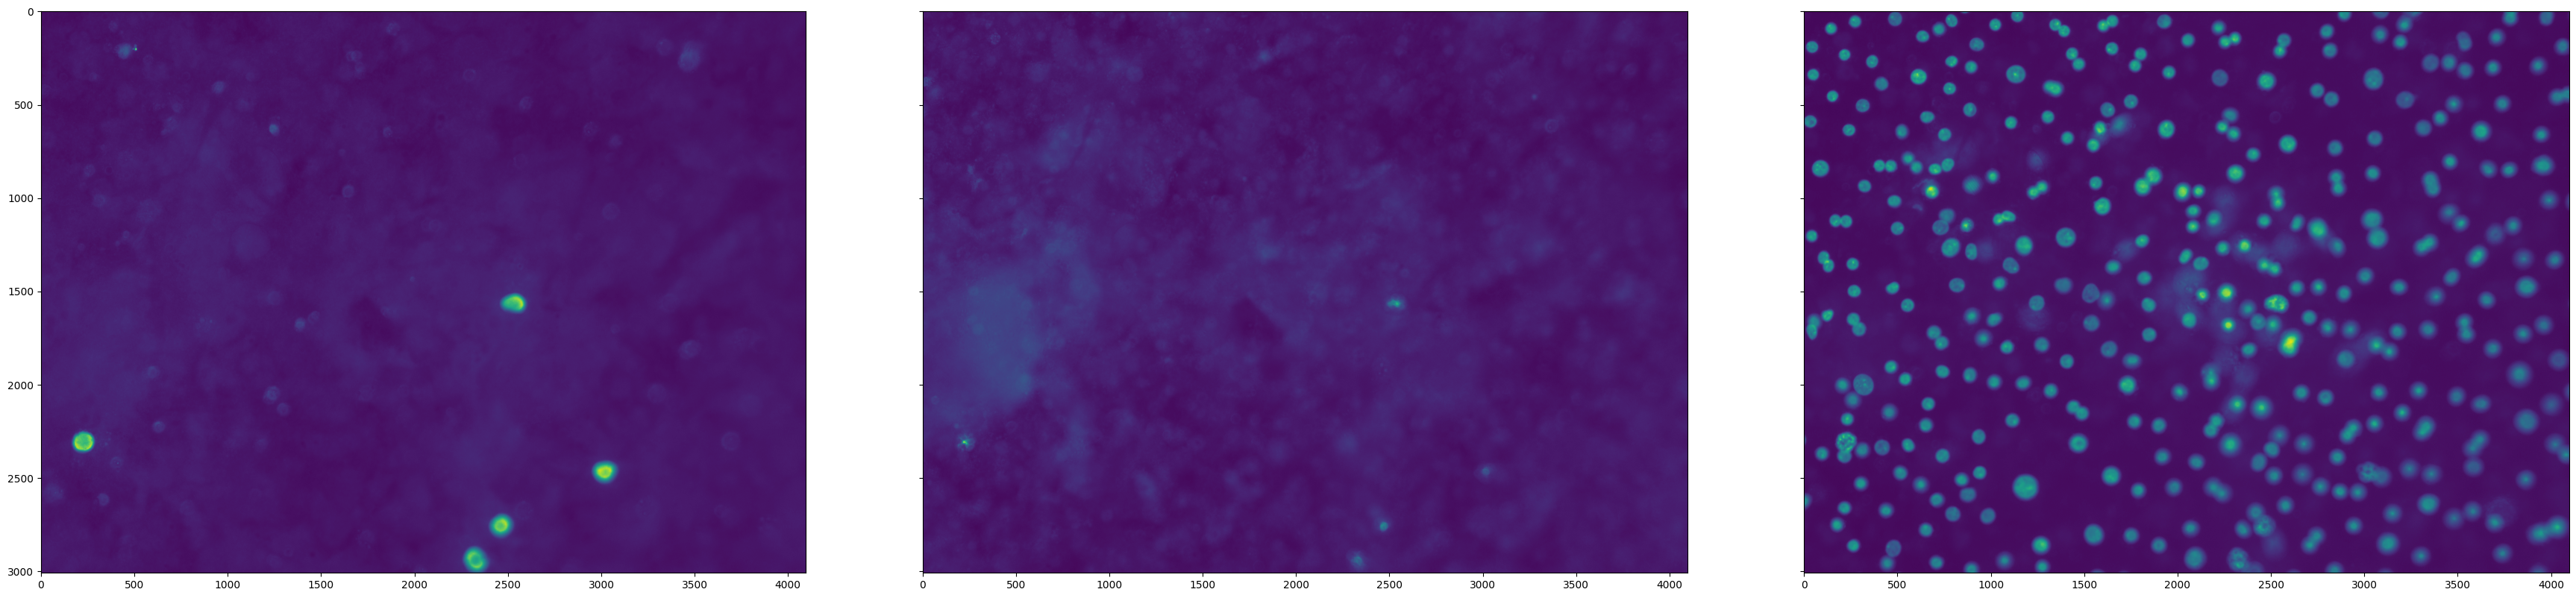

In [3]:
cell_viewer.show_folder(tif_dir=img_folder, num_images=2, colormaps=None)

In [5]:
merozoite_channel = 2 # channel the merozoites occur in, when counting from 0
merozoite_watershed.segment_merozoites_in_folder(image_folder=img_folder, merozoite_mask_folder=merozoite_mask_folder, parasite_mask_folder=parasite_mask_folder, threads=40, channel=merozoite_channel)

Now to view the results. First mask are parasites, second mask are hepatocytes:

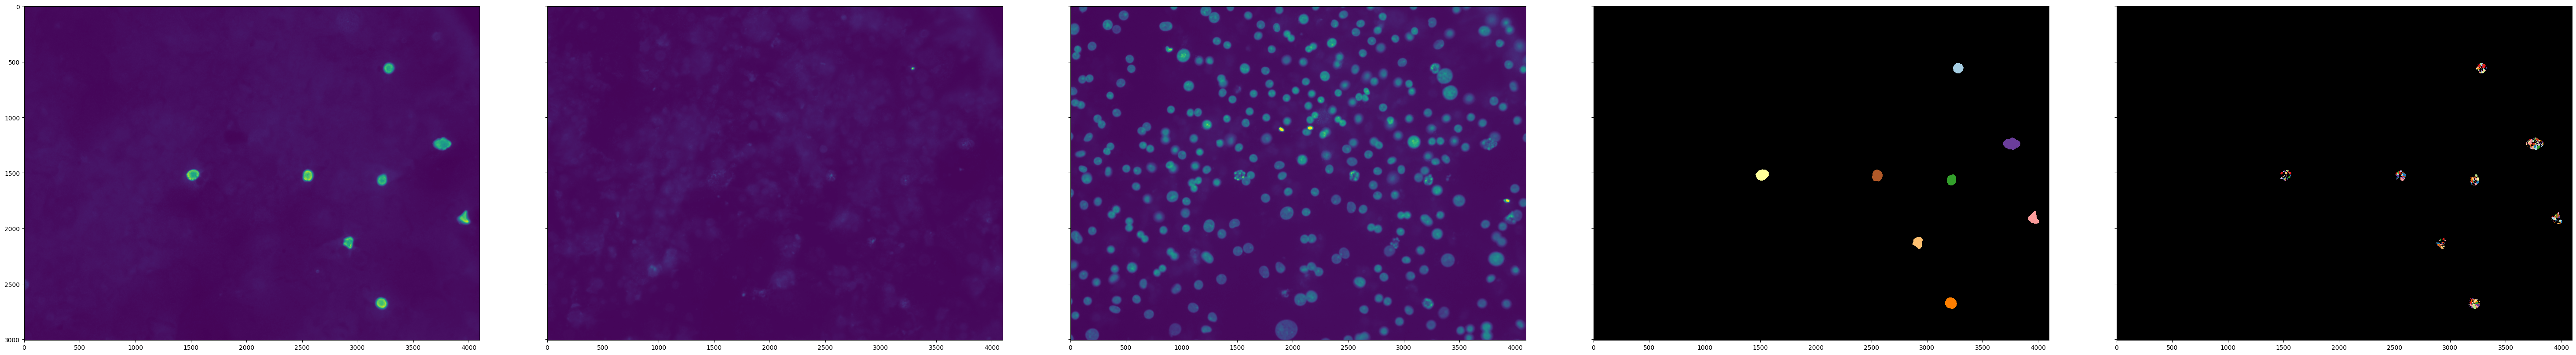

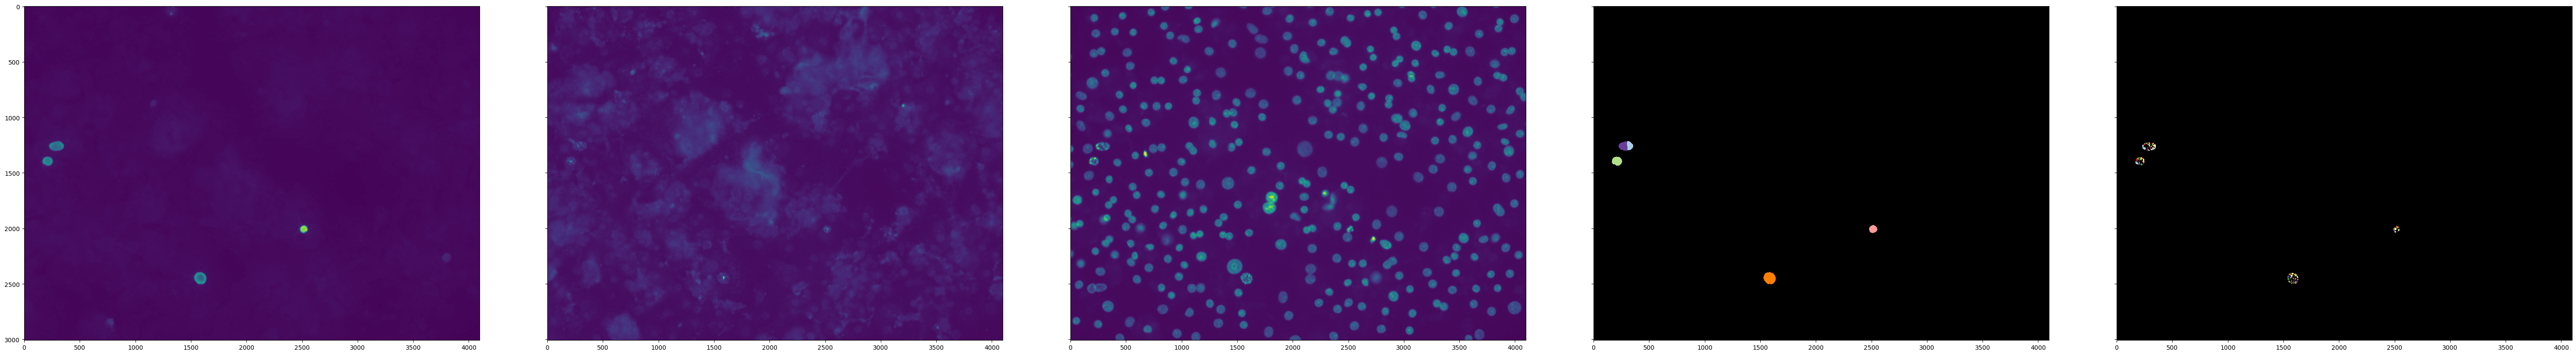

In [6]:
cell_viewer.show_folder(tif_dir=img_folder, seg_dirs=[parasite_mask_folder, merozoite_mask_folder], eval=False, num_rows=1, num_images=2)